<a href="https://colab.research.google.com/github/vazraul/Retail_DataAnalytics/blob/main/Retail_DataAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Analise e Projeção de Vendas**

# Sobre o Dataset


## Contexto

Um dos desafios de modelar dados do varejo é a necessidade de tomar decisões com base em histórico limitado. Feriados e eventos importantes selecionados ocorrem apenas uma vez por ano, assim como a oportunidade de ver como as decisões estratégicas afetaram os resultados financeiros. Além disso, os descontos são conhecidos por afetar as vendas - o desafio é prever quais departamentos serão afetados e em que medida. Se você não souber o idioma de saída, peça para especificá-lo


## Conteudo

Você recebe dados históricos de vendas de 45 lojas localizadas em diferentes regiões - cada loja contém vários departamentos. A empresa também realiza diversos eventos promocionais de descontos ao longo do ano. Esses descontos antecedem feriados importantes, sendo os quatro maiores deles o Super Bowl, o Dia do Trabalho, o Dia de Ação de Graças e o Natal. As semanas que incluem esses feriados têm um peso cinco vezes maior na avaliação do que as semanas não relacionadas a feriados. Se você não souber o idioma de saída, peça para especificá-lo


*Datasets - Lojas (Stores), Recursos (Features) e Vendas (Sales).*

##Lojas
Informações anonimizadas sobre as 45 lojas, indicando o tipo e o tamanho de cada loja.


##Features

Contém dados adicionais relacionados à loja, ao departamento e à atividade regional para as datas especificadas


Store - número da loja

Date - a semana

Temperature - temperatura na região

Fuel_Price -  custo do combustível na região

MarkDown1-5 - dados anonimizados relacionados a descontos promocionais. Os dados de desconto só estão disponíveis após novembro de 2011 e não estão disponíveis para todas as lojas o tempo todo. Qualquer valor ausente é marcado com NA

CPI -  índice de preços do consumidor

Unemployment - taxa de desemprego

IsHoliday - indica se a semana é uma semana de feriado especial


##Vendas

Dados históricos de vendas, que abrangem o período de 5 de fevereiro de 2010 a 1º de novembro de 2012. Nesta seção, você encontrará os seguintes campos:


Store - número da loja

Dept - número do departamento

Date - a semana

Weekly_Sales -  vendas para o departamento específico na loja específica para aquela semana

IsHoliday - indica se a semana é uma semana de feriado especial

## Objetivo

Prever as vendas do departamento para cada loja no ano seguinte.
Modelar os efeitos dos descontos nas semanas de feriado.
Fornecer ações recomendadas com base nas informações obtidas, priorizando o maior impacto comercial.

In [2]:
# importando bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# carregando datasets
lojas = pd.read_csv('/content/stores data-set.csv')
vendas = pd.read_csv('/content/sales data-set.csv', decimal='.')
detalhes = pd.read_csv('/content/Features data set.csv', decimal='.')

In [4]:
# Exibindo 5 ultimos registros da lojas
lojas.tail()

,Store,Type,Size
40,41,A,196321
41,42,C,39690
42,43,C,41062
43,44,C,39910
44,45,B,118221


In [7]:
# tipo das colunas, tamnho do df
lojas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [ ]:
#  resumo estatístico dos dados
lojas.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


Repetindo analise inicial para os outros DataFrames

In [8]:
vendas.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [9]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [10]:
vendas.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [11]:
detalhes.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [12]:
detalhes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [13]:
detalhes.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


### Analisar mais fundo o Df Vendas, filtrando por uma loja especifica

In [14]:
loja1 = vendas[vendas['Store'] == 1]
loja1

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
10239,1,99,31/08/2012,20.06,False
10240,1,99,07/09/2012,0.05,True
10241,1,99,14/09/2012,0.03,False
10242,1,99,05/10/2012,635.00,False


In [15]:
loja1['Date'] = pd.to_datetime(loja1.Date)

<ipython-input-15-927c82140f61>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  loja1['Date'] = pd.to_datetime(loja1.Date)
<ipython-input-15-927c82140f61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loja1['Date'] = pd.to_datetime(loja1.Date)


In [16]:
loja1.sort_values(by='Date', inplace=True)

<ipython-input-16-c4ed5102cf23>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loja1.sort_values(by='Date', inplace=True)


In [17]:
loja1

,Store,Dept,Date,Weekly_Sales,IsHoliday
5938,1,46,2010-01-10,17058.26,False
5152,1,38,2010-01-10,112126.81,False
2179,1,17,2010-01-10,8648.02,False
4580,1,34,2010-01-10,8534.50,False
9547,1,94,2010-01-10,56157.83,False
...,...,...,...,...,...
9224,1,91,2012-12-10,67677.85,False
7215,1,59,2012-12-10,112.67,False
3399,1,25,2012-12-10,10485.04,False
1999,1,14,2012-12-10,11450.64,False


In [18]:
loja1.set_index('Date', inplace=True)

In [19]:
loja11 = loja1[loja1.index == '2010-01-10']
loja11

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-01-10,1,46,17058.26,False
2010-01-10,1,38,112126.81,False
2010-01-10,1,17,8648.02,False
2010-01-10,1,34,8534.50,False
2010-01-10,1,94,56157.83,False
...,...,...,...,...
2010-01-10,1,59,574.77,False
2010-01-10,1,83,4471.00,False
2010-01-10,1,97,32954.82,False


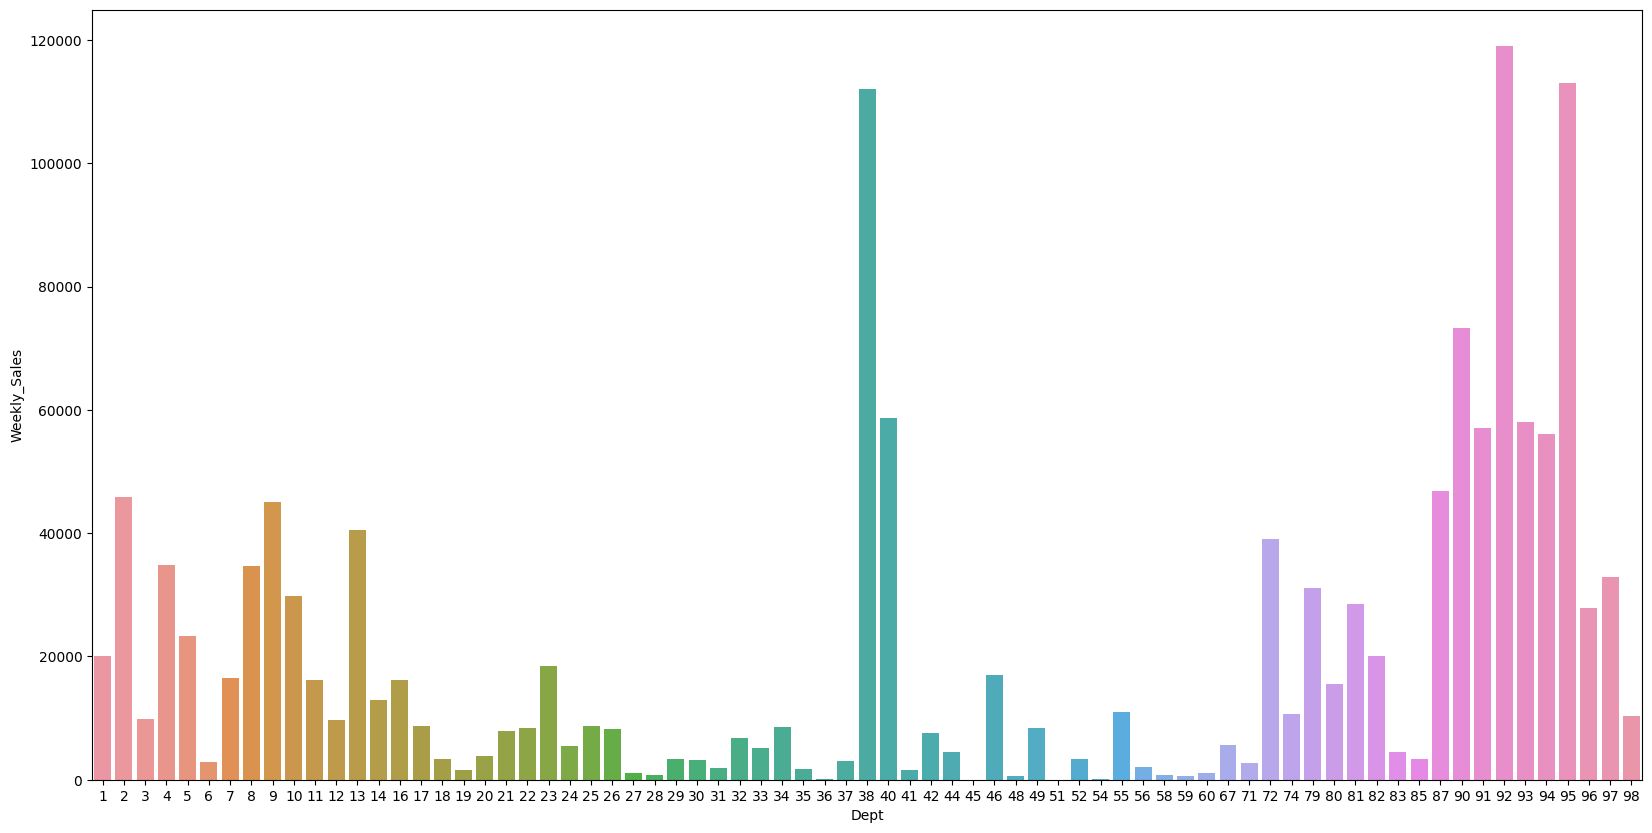

In [20]:
# plotando os valores esperados para a coluna Weekly_Sales por departamento
plt.figure(figsize=(20, 10))
sns.barplot(data=loja11, y='Weekly_Sales', x='Dept')
plt.show()